<a href="https://colab.research.google.com/github/calsun1905/histogram-shapes/blob/main/histogarm_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

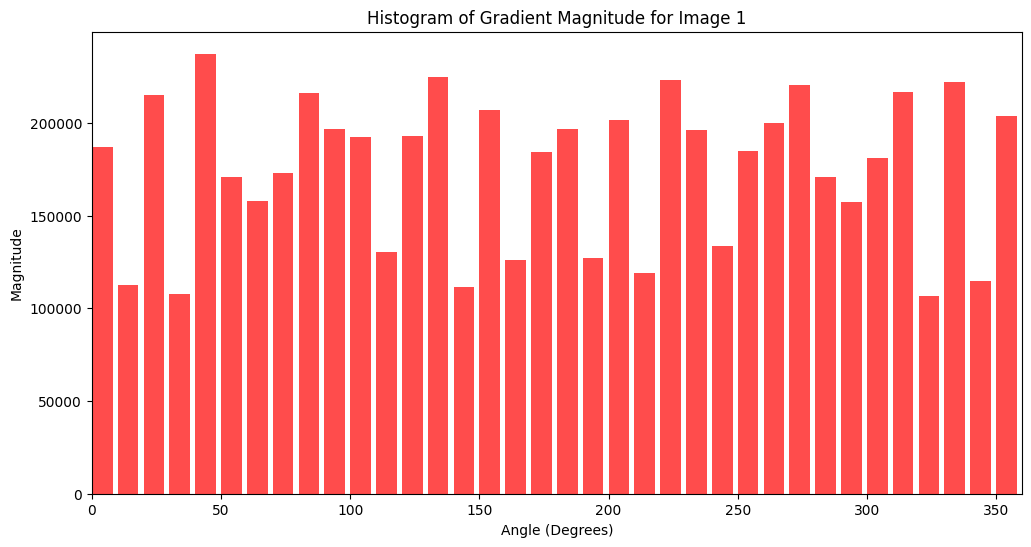

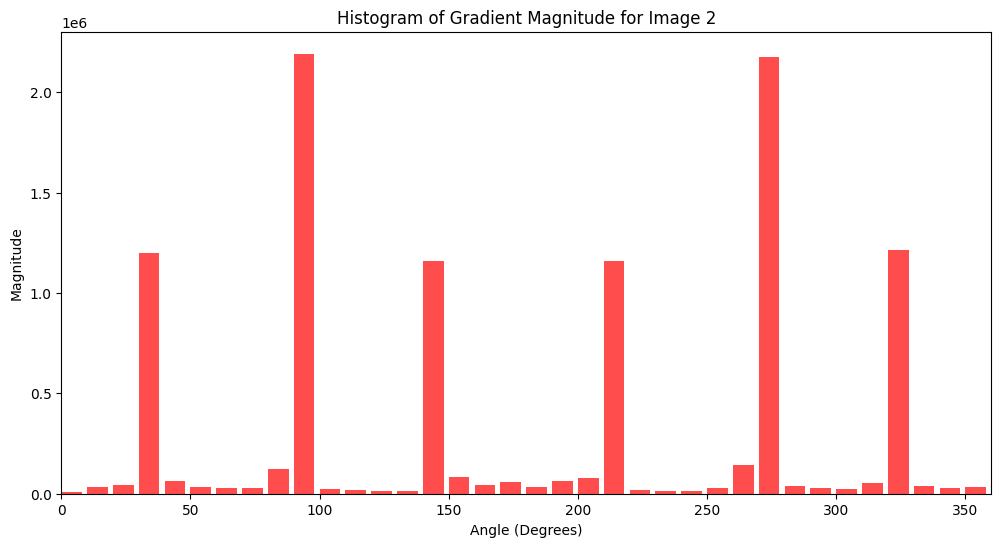

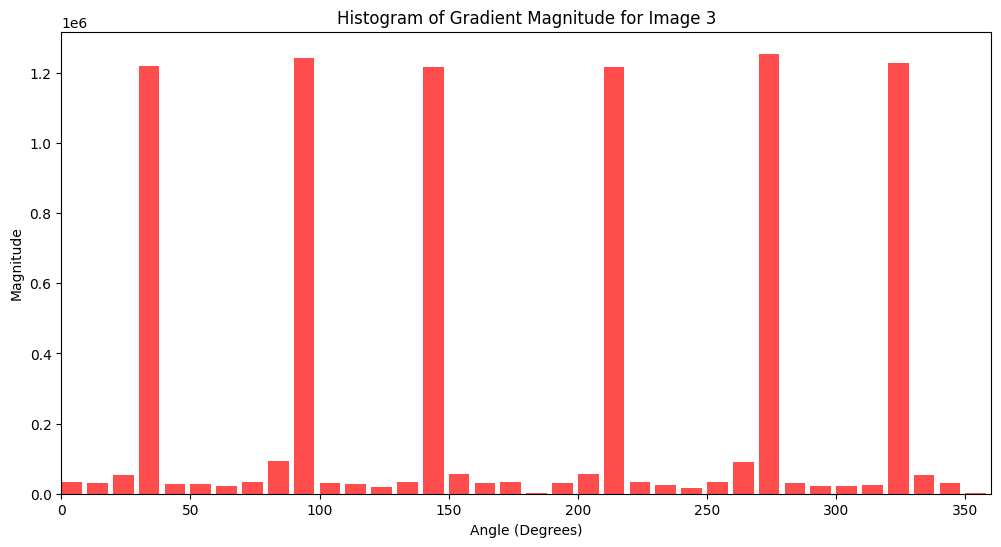

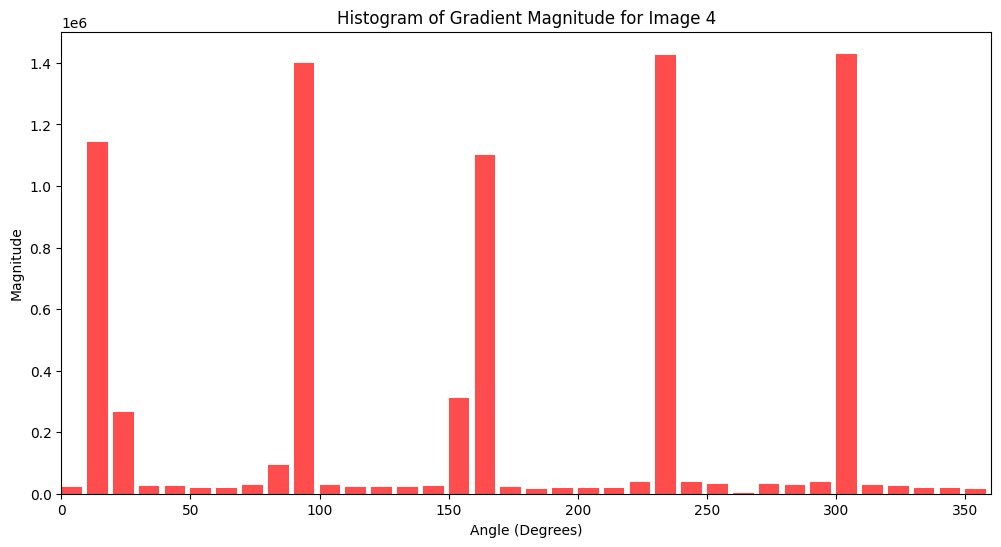

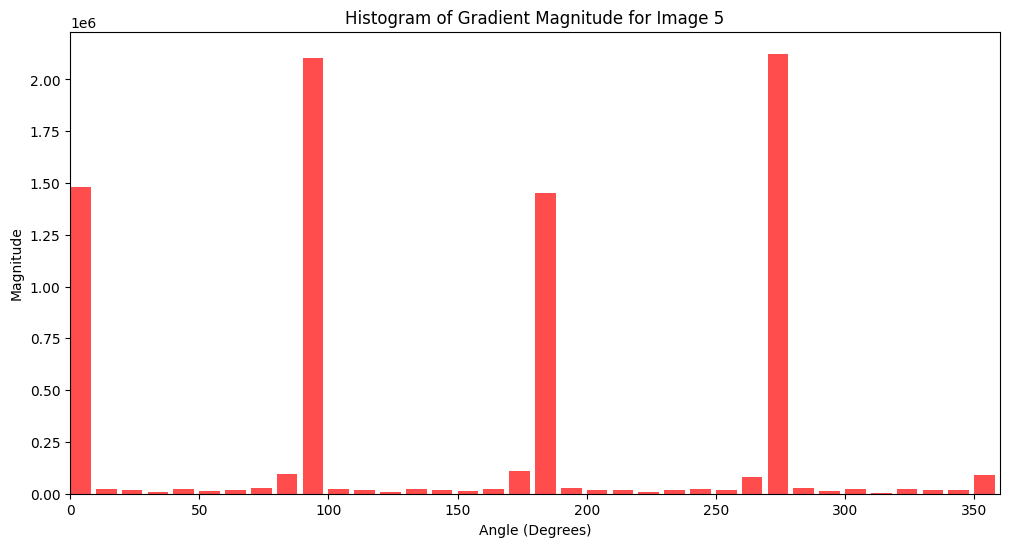

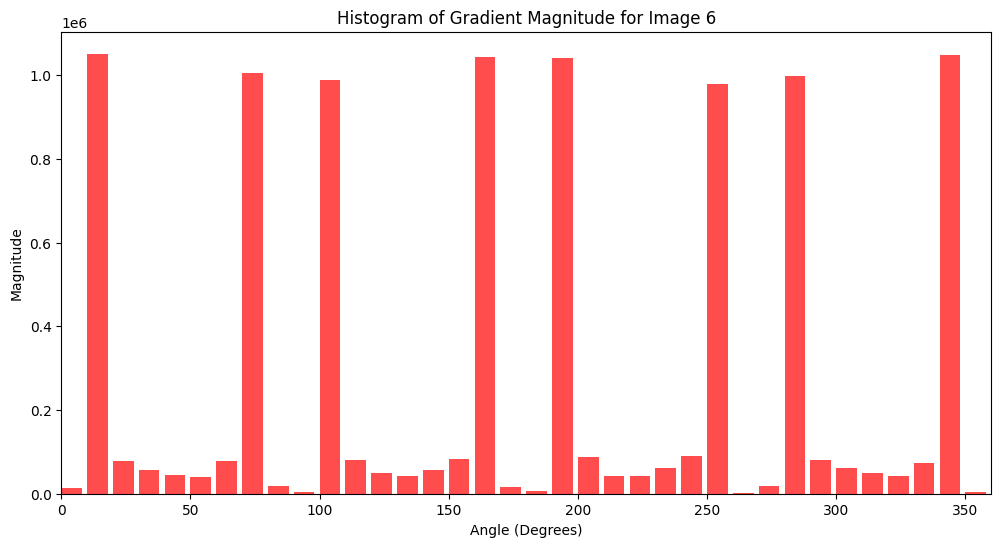

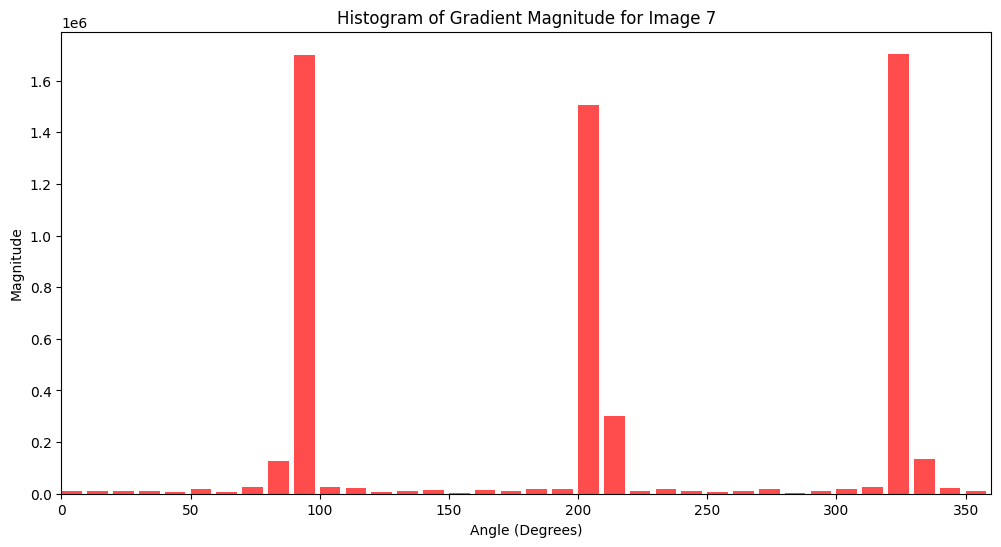

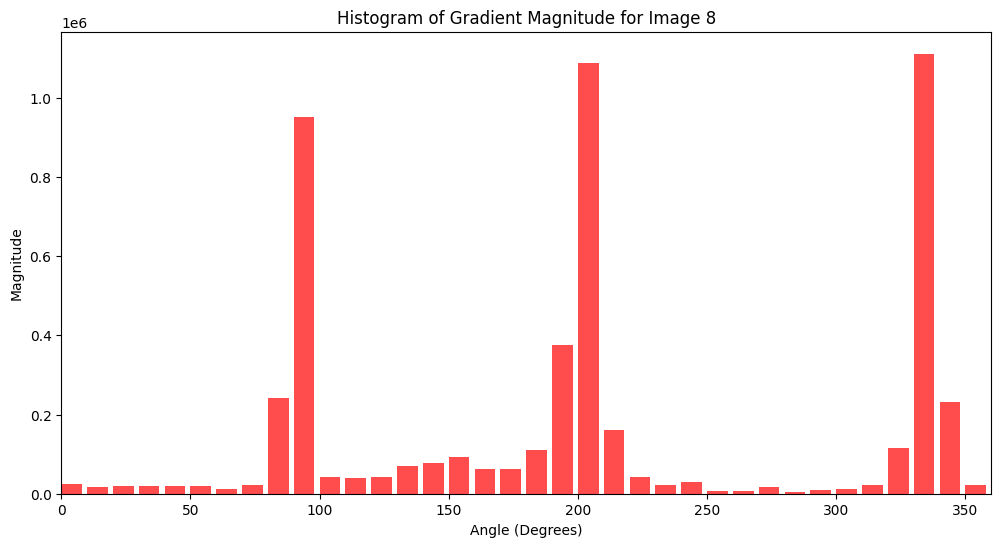

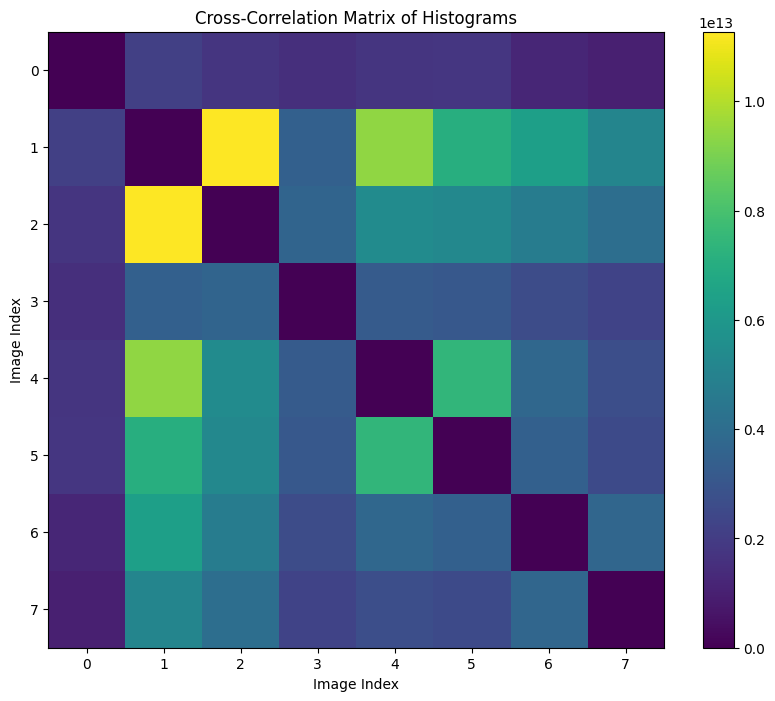

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# images are listed so they can be read
image_paths = [
    "/content/circle.bmp",
    "/content/hexagon.bmp",
    "/content/hexagon2.bmp",
    "/content/pentagon.bmp",
    "/content/square.bmp",
    "/content/star.bmp",
    "/content/triangle.bmp",
    "/content/WIN_20240311_17_35_04_Pro.jpg",
]

# a histogram must be drawn for each image that listed and an empty list of histograms is created
all_histograms = []

# histograms are created sequentially for all seven images(circle,hexagon,hexagon2,pentagon,square,star,triangle)
for image_path in image_paths:

    # reading and resizing image
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (150, 112))

    # blurring operations can be used to create a clear image or it can provide more workability also soften edges.
    newsFimage = cv2.GaussianBlur(resized_image, (7, 7), 0)

    # grayscale
    lastImage = cv2.cvtColor(newsFimage, cv2.COLOR_BGR2GRAY)

    # functions used to find angle and magnitudes of pixels gradient  and in order to draw histograms find the vertical and horizontal density values through derivatives.
    # "ksize" represents the size of the kernel and by decreasing or increasing it sensitivity can change and more precise or general result can be obtained.
    sobel_x = cv2.Sobel(lastImage, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(lastImage, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = np.sqrt((sobel_x ** 2) + (sobel_y ** 2))
    gradient_angle = np.arctan2(sobel_y, sobel_x)

    # converting angles to degrees and integer types
    gradient_angle_degrees = np.degrees(gradient_angle)

    # "threshold" is the critical value to be used to determine pixels
    threshold = 30

    # Creating histogram bins and histogram for current image
    bins = np.arange(0, 361, 10)  # Divide 0-360 degrees into 10 equal bins
    histogram = np.zeros(len(bins) - 1)

    # Loop over gradient angles and magnitudes to calculate histogram
    for i in range(gradient_angle_degrees.shape[0]):
        for j in range(gradient_angle_degrees.shape[1]):
            magnitude = gradient_magnitude[i, j]
            angle = gradient_angle_degrees[i, j]
            if magnitude > threshold:
                bin_index = int(angle // 10)  # Determine the bin index within 0-35 range
                histogram[bin_index] += magnitude
    all_histograms.append(histogram)

for i, histogram in enumerate(all_histograms):
    plt.figure(figsize=(12, 6))
    bins = np.arange(0, 361, 10)  # Divide 0-360 degrees into 10 equal bins
    plt.bar(bins[:-1], histogram, width=8, align='edge', color='red', alpha=0.7)
    plt.title(f'Histogram of Gradient Magnitude for Image {i+1}')
    plt.xlabel('Angle (Degrees)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 360)  # Limit the x-axis to 0-360 degrees
    plt.show()

    # Calculate cross-correlation between histograms
num_images = len(all_histograms)
cross_correlation_matrix = np.zeros((num_images, num_images))

for i in range(num_images):
    for j in range(num_images):
        if i != j:
            # Calculate cross-correlation between histograms i and j
            cross_corr = np.correlate(all_histograms[i], all_histograms[j], mode='full')
            # Store the maximum value of the cross-correlation
            cross_correlation_matrix[i, j] = np.max(cross_corr)

# Display the cross-correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(cross_correlation_matrix, cmap='viridis', interpolation='nearest')
plt.title('Cross-Correlation Matrix of Histograms')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.colorbar()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# images are listed so they can be read
image_paths = [
    "/content/circle.bmp",
    "/content/hexagon.bmp",
    "/content/hexagon2.bmp",
    "/content/pentagon.bmp",
    "/content/square.bmp",
    "/content/star.bmp",
    "/content/triangle.bmp",
]

# a histogram must be drawn for each image that listed and an empty list of histograms is created
all_histograms = []

# histograms are created sequentially for all seven images(circle,hexagon,hexagon2,pentagon,square,star,triangle)
for image_path in image_paths:

    # reading and resizing image
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (150, 112))

    # blurring operations can be used to create a clear image or it can provide more workability also soften edges.
    newsFimage = cv2.GaussianBlur(resized_image, (7, 7), 0)

    # grayscale
    lastImage = cv2.cvtColor(newsFimage, cv2.COLOR_BGR2GRAY)

    # functions used to find angle and magnitudes of pixels gradient  and in order to draw histograms find the vertical and horizontal density values through derivatives.
    # "ksize" represents the size of the kernel and by decreasing or increasing it sensitivity can change and more precise or general result can be obtained.
    sobel_x = cv2.Sobel(lastImage, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(lastImage, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = np.sqrt((sobel_x ** 2) + (sobel_y ** 2))
    gradient_angle = np.arctan2(sobel_y, sobel_x)

    # converting angles to degrees and integer types
    gradient_angle_degrees = np.degrees(gradient_angle)

    # "threshold" is the critical value to be used to determine pixels
    threshold = 30

    # Creating histogram bins and histogram for current image
    bins = np.arange(0, 361, 10)  # Divide 0-360 degrees into 10 equal bins
    histogram = np.zeros(len(bins) - 1)

    # Loop over gradient angles and magnitudes to calculate histogram
    for i in range(gradient_angle_degrees.shape[0]):
        for j in range(gradient_angle_degrees.shape[1]):
            magnitude = gradient_magnitude[i, j]
            angle = gradient_angle_degrees[i, j]
            if magnitude > threshold:
                bin_index = int(angle // 10)  # Determine the bin index within 0-35 range
                histogram[bin_index] += magnitude
    all_histograms.append(histogram)

# Define the find_shape function here
def find_shape(image_path, all_histograms):
    # Reading and resizing the image
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (150, 112))

    # Blurring for clarity and reducing noise
    blurred_image = cv2.GaussianBlur(resized_image, (7, 7), 0)

    # Convert to grayscale
    grayscale_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

    # Calculate gradient magnitude and angle
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = np.sqrt((sobel_x ** 2) + (sobel_y ** 2))
    gradient_angle = np.arctan2(sobel_y, sobel_x)
    gradient_angle_degrees = np.degrees(gradient_angle)

    # Set threshold
    threshold = 30

    # Create histogram bins
    bins = np.arange(0, 361, 10)
    histogram = np.zeros(len(bins) - 1)

    # Loop over gradient angles and magnitudes to calculate histogram
    for i in range(gradient_angle_degrees.shape[0]):
        for j in range(gradient_angle_degrees.shape[1]):
            magnitude = gradient_magnitude[i, j]
            angle = gradient_angle_degrees[i, j]
            if magnitude > threshold:
                bin_index = int(angle // 10)
                histogram[bin_index] += magnitude

    # Calculate cross-correlation with each shape's histogram
    correlations = []
    for ref_histogram in all_histograms:
        correlation = np.correlate(histogram, ref_histogram)
        correlations.append(correlation)

    # Find the shape index with maximum correlation
    max_index = np.argmax(correlations)

    # Shapes
    shapes = ["Circle", "Hexagon", "Hexagon 2", "Pentagon", "Square", "Star", "Triangle"]

    # Print the histogram index and the corresponding shape
    print(f"Histogram of Shape {max_index + 1} most likely corresponds to a {shapes[max_index]}.")

# Örnek kullanım
image_path = "/content/WIN_20240311_17_35_04_Pro.jpg"  # Your image path here
find_shape(image_path, all_histograms)

Histogram of Shape 7 most likely corresponds to a Triangle.
